# Graph Lab

## Header information:

  - Author #1: Nivetha Kuruparan (kuruparn@mcmaster.ca)
  - Author #2: Tanveer Brar (brart5@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/brart5/l1-graph-lab
  - Avenue to Learn group name: 31

Calling the metric extractor to retrieve the data from the csv files.

In [1]:
from Python.metrics_extractor import *

stations_list = extract_data('_dataset/london.stations.csv')
lines_list = extract_data('_dataset/london.lines.csv')
connections_list = extract_data('_dataset/london.connections.csv')

Creating the graph from the data.
Computing the number of nodes (stations), the number of edges (connections), and the average degree of all the nodes in the graph.

In [2]:
from Python.GraphBuilder.graph import *

g = Graph(stations_list, lines_list, connections_list)

print("\nNumber of Stations:", g.num_stations)

print("Number of Connections:", int(g.num_connections / 2))
print("\tUndirected Graph (multiplied edges by 2):", g.num_connections)

print("Average Degree of Nodes:", round(g.average_degree(), 2))


Number of Stations: 302
Number of Connections: 406
	Undirected Graph (multiplied edges by 2): 812
Average Degree of Nodes: 2.69


Drawing the distribution of node’s degree.

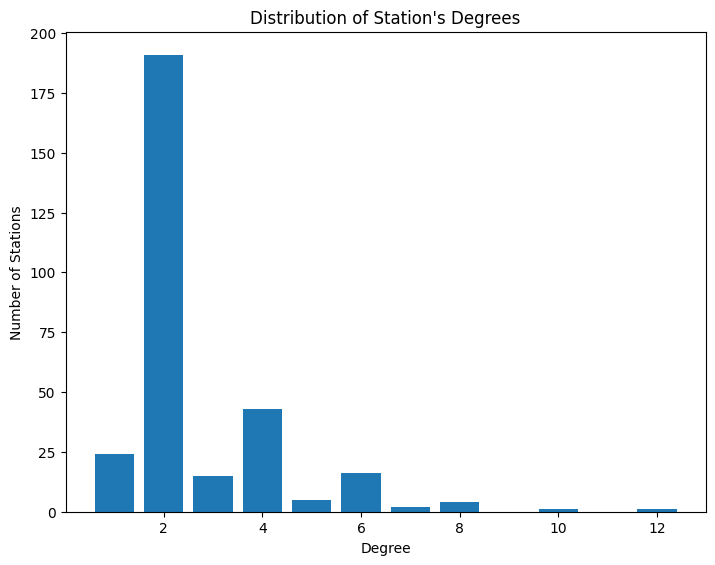

In [3]:
import matplotlib.pyplot as matplot

degrees, frequencies = g.degree_frequency()

sheet = matplot.figure()

bar_graph = sheet.add_axes([0,0,1,1])
bar_graph.bar(degrees, frequencies)
bar_graph.set_ylabel('Number of Stations')
bar_graph.set_xlabel('Degree')
bar_graph.set_title("Distribution of Station's Degrees")

matplot.show()

Designing the Itinerary Structure.

In [4]:
from Python.itinerary import *

Itinerary(g.connections, '11', '22') # Case 1: Best Possible Path (Least time AND Least Stations) + Alternative Routes
Itinerary(g.connections, '11', '200') # Case 2: Two Possible Paths (One with least time + One with least stations)
Itinerary(g.connections, '11', '400') # Case 3: Station does not exsit
Itinerary(g.connections, '11', '193') # Case 4: Two Possible Paths + Alternative Routs


****************** ITINERARY ******************
Starting Station: 11
Destination: 22
Creating Itinerary...

Displaying route with the least amount of time:
Station 11 -> Station 28 (Line: 7 Time: 2)
Station 28 -> Station 192 (Line: 2 Time: 1)
Station 192 -> Station 277 (Line: 11 Time: 2)
Station 277 -> Station 89 (Line: 9 Time: 1)
Station 89 -> Station 40 (Line: 9 Time: 3)
Station 40 -> Station 47 (Line: 9 Time: 2)
Station 47 -> Station 22 (Line: 9 Time: 2)
Total Time: 13
Total Number of Stations: 8

Displaying alternative routes:
1: Station 11 -> Station 212 -> Station 192 -> Station 277 -> Station 89 -> Station 40 -> Station 47 -> Station 22
2: Station 11 -> Station 104 -> Station 90 -> Station 145 -> Station 89 -> Station 40 -> Station 47 -> Station 22
3: Station 11 -> Station 212 -> Station 192 -> Station 277 -> Station 89 -> Station 170 -> Station 40 -> Station 47 -> Station 22
4: Station 11 -> Station 28 -> Station 192 -> Station 277 -> Station 89 -> Station 170 -> Station 40 ->

Write a benchmark to compare itinerary finding implementations.